In [1]:
pwd

'/Users/sathishrajendiran/ist718-python/Walk/Week4'

In [2]:
!pip install pandas_datareader

  Using cached pandas_datareader-0.9.0-py3-none-any.whl (107 kB)


In [3]:
!pip install keras

  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)


*   Course: IST 718
*   Authors: Sathish Kumar Rajediran
*   Task: Week4 Async
*   Task Item: Time Series
*   Date: April 27,2021

In [4]:
# ***********************************************************************************
#      import libraries
# ***********************************************************************************

# standard library
import os
import sys
from datetime import datetime
import time
import timeit


# import packages for analysis and modeling
import pandas as pd  # data frame operations

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting

import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING


print('Libraries imported successfully!\n')

os.getcwd()

Libraries imported successfully!



'/Users/sathishrajendiran/ist718-python/Walk/Week4'

In [5]:
# Show all columns and do not truncate in the data frame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


In [6]:
tech_list = ['GOOG', 'MSFT', 'AMZN','PLAN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [7]:
company_list = [GOOG, MSFT, AMZN,PLAN]
company_name = [ "GOOGLE", "MICROSOFT", "AMAZON","PLAN"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2021-05-10,55.240002,53.250000,54.080002,54.509998,1894900.0,54.509998,PLAN
2021-05-11,56.669998,51.779999,52.009998,55.580002,2109900.0,55.580002,PLAN
2021-05-12,55.779999,52.790001,54.209999,53.639999,2597900.0,53.639999,PLAN
2021-05-13,55.650002,51.310001,54.389999,52.240002,2548500.0,52.240002,PLAN
2021-05-14,54.380001,51.730000,52.709999,53.619999,2446700.0,53.619999,PLAN
2021-05-17,53.889999,52.099998,53.000000,53.160000,1368100.0,53.160000,PLAN
2021-05-18,55.259998,53.340000,53.750000,53.919998,2074000.0,53.919998,PLAN
2021-05-19,54.950001,52.180000,52.529999,54.750000,2157500.0,54.750000,PLAN
2021-05-20,56.930000,55.090000,55.500000,56.340000,2816100.0,56.340000,PLAN


In [8]:
# summary statistics
summary = PLAN.describe()
summary.head()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,60.327727,57.801225,59.086008,59.037747,2.466221e+06,59.037747
std,10.445519,10.129221,10.293647,10.255687,1.578509e+06,10.255687
min,43.790001,41.509998,42.169998,42.389999,5.154000e+05,42.389999
25%,50.990002,48.950001,49.720001,49.439999,1.529400e+06,49.439999


In [9]:
print(PLAN.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-05-21 to 2021-05-21
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          253 non-null    float64
 1   Low           253 non-null    float64
 2   Open          253 non-null    float64
 3   Close         253 non-null    float64
 4   Volume        253 non-null    int64  
 5   Adj Close     253 non-null    float64
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB
None


## Change in price of the stock overtime

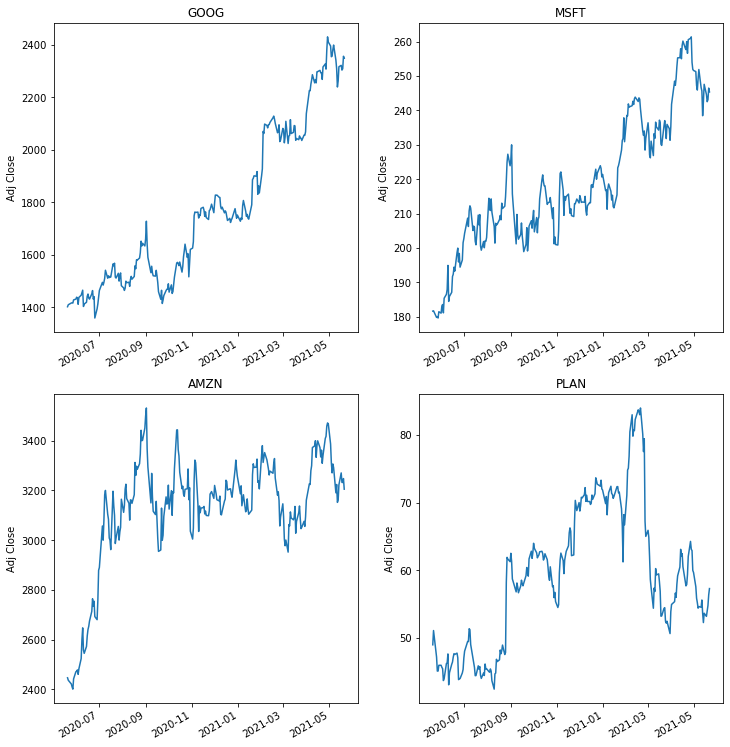

In [10]:
# Let's see a historical view of the closing price


plt.figure(figsize=(12, 9))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")
    # Rotate x-labels
    plt.xticks(rotation=30)

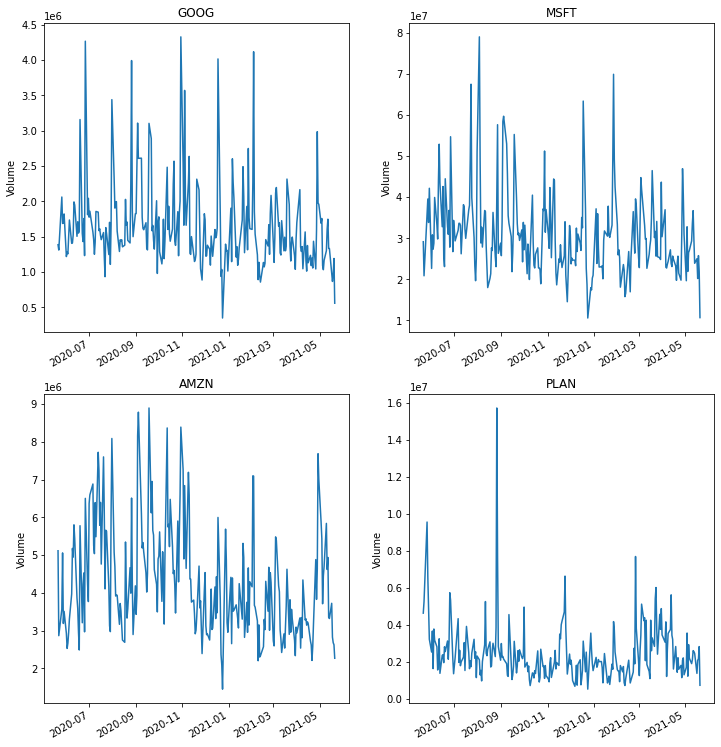

In [11]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(12, 9))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

## moving average of the various stocks

In [12]:

ma_day = [10, 30, 60] # 10,30 and 60 days moving average

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

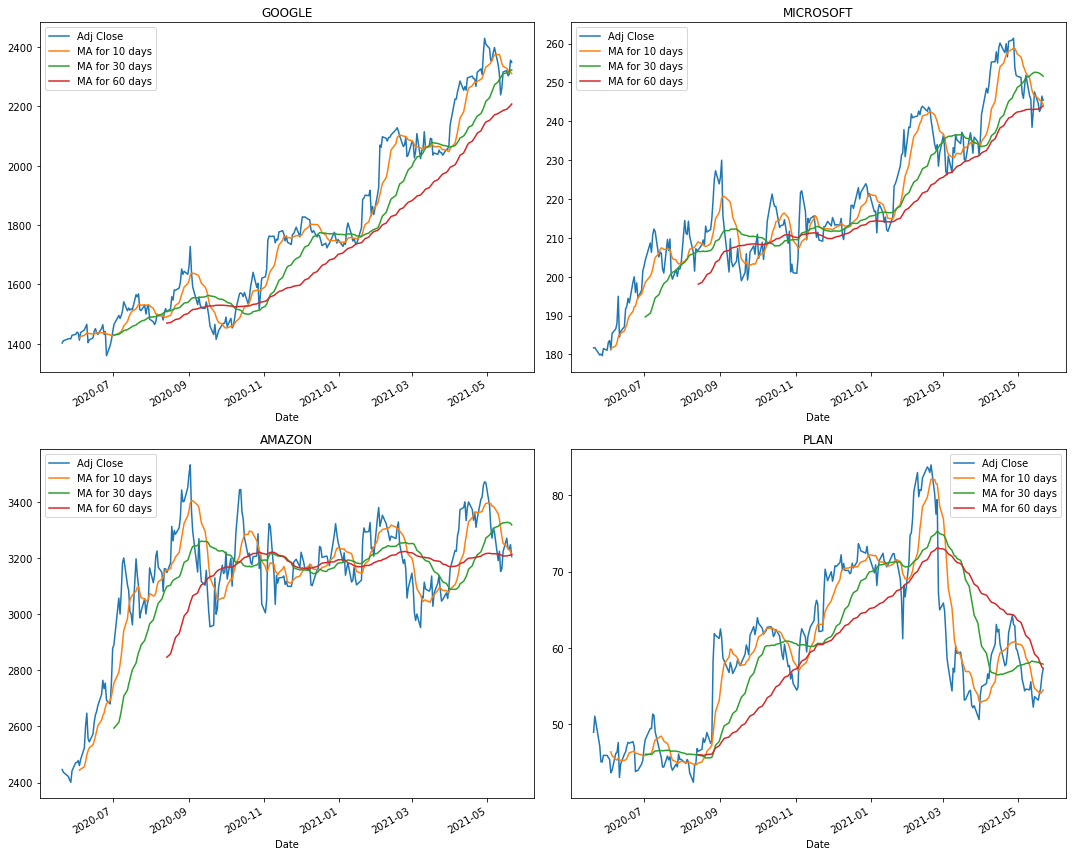

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(12)
fig.set_figwidth(15)

GOOG[['Adj Close', 'MA for 10 days', 'MA for 30 days', 'MA for 60 days']].plot(ax=axes[0,0])
axes[0,0].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 30 days', 'MA for 60 days']].plot(ax=axes[0,1])
axes[0,1].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 30 days', 'MA for 60 days']].plot(ax=axes[1,0])
axes[1,0].set_title('AMAZON')

PLAN[['Adj Close', 'MA for 10 days', 'MA for 30 days', 'MA for 60 days']].plot(ax=axes[1,1])
axes[1,1].set_title('PLAN')

fig.tight_layout()

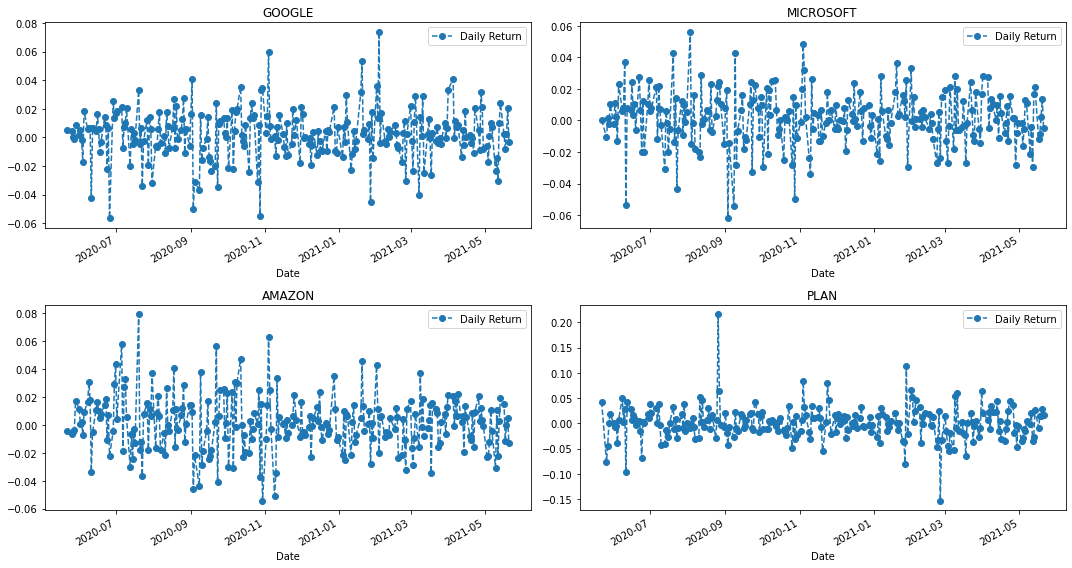

In [14]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

GOOG['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('AMAZON')

PLAN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('PLAN')

fig.tight_layout()

/Users/sathishrajendiran/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sathishrajendiran/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sathishrajendiran/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fi

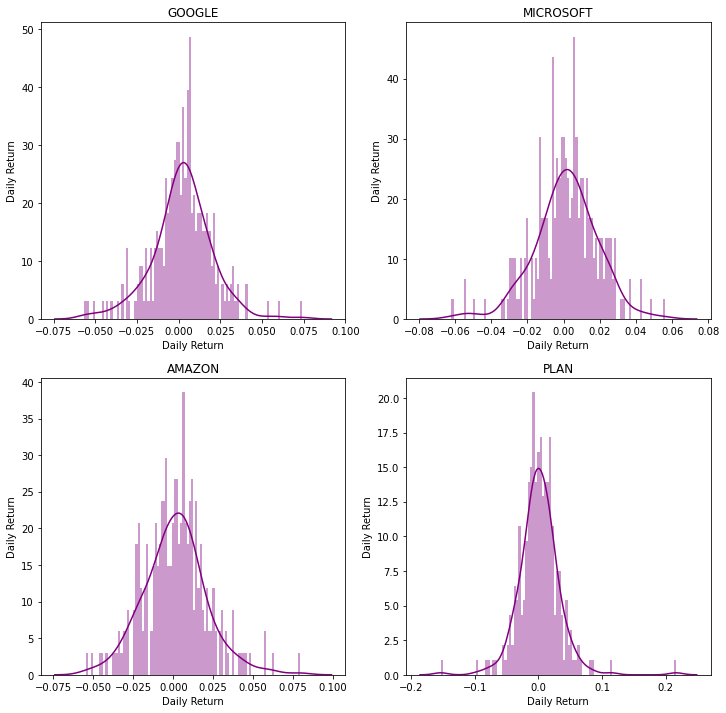

In [15]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
# Could have also done:
#AAPL['Daily Return'].hist()

In [16]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.tail() 

Symbols,GOOG,MSFT,AMZN,PLAN
Date,,,,
2021-05-17,2321.409912,244.615158,3270.389893,53.160000
2021-05-18,2303.429932,242.520004,3232.280029,53.919998
2021-05-19,2308.709961,243.119995,3231.800049,54.750000
2021-05-20,2356.090088,246.479996,3247.679932,56.340000
2021-05-21,2348.590088,245.339996,3204.570068,57.270000


In [17]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.tail()

Symbols,GOOG,MSFT,AMZN,PLAN
Date,,,,
2021-05-17,0.002267,-0.011969,0.014735,-0.008579
2021-05-18,-0.007745,-0.008565,-0.011653,0.014296
2021-05-19,0.002292,0.002474,-0.000148,0.015393
2021-05-20,0.020522,0.013820,0.004914,0.029041
2021-05-21,-0.003183,-0.004625,-0.013274,0.016507


/Users/sathishrajendiran/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


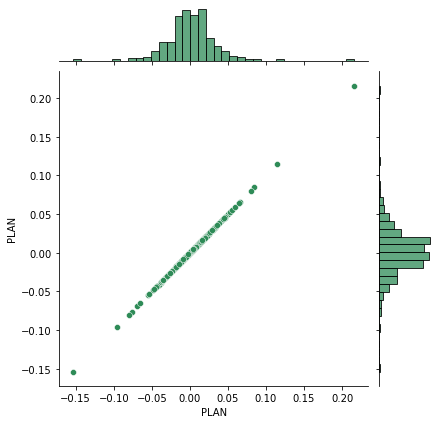

In [18]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('PLAN', 'PLAN', tech_rets, kind='scatter', color='seagreen')

/Users/sathishrajendiran/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


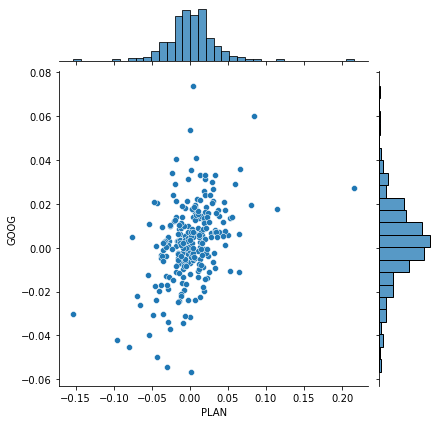

In [19]:
# We'll use joinplot to compare the daily returns of Plan and Microsoft
sns.jointplot('PLAN', 'GOOG', tech_rets, kind='scatter')

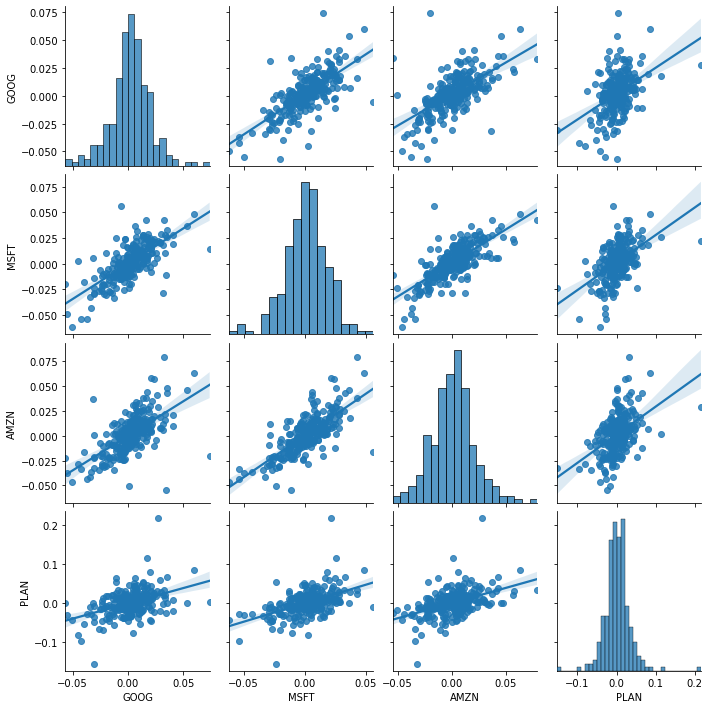

In [20]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

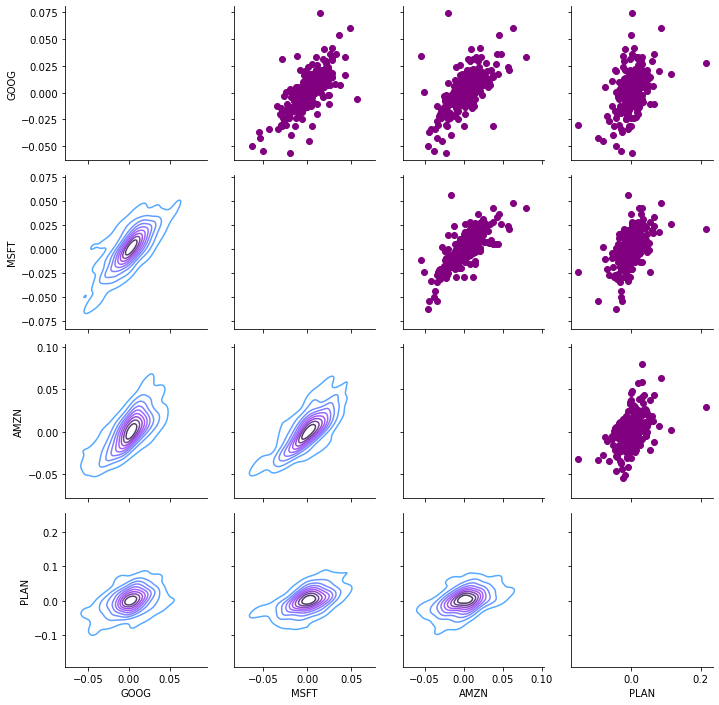

In [21]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

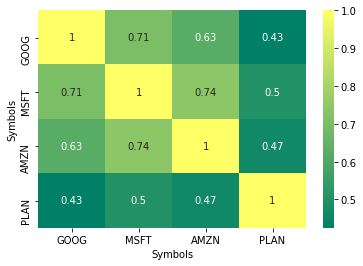

In [22]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

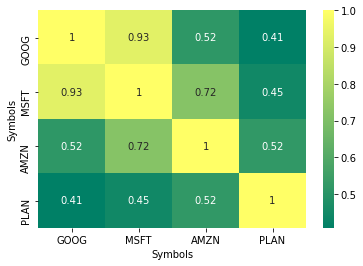

In [23]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

How much value do we put at risk by investing in a particular stock

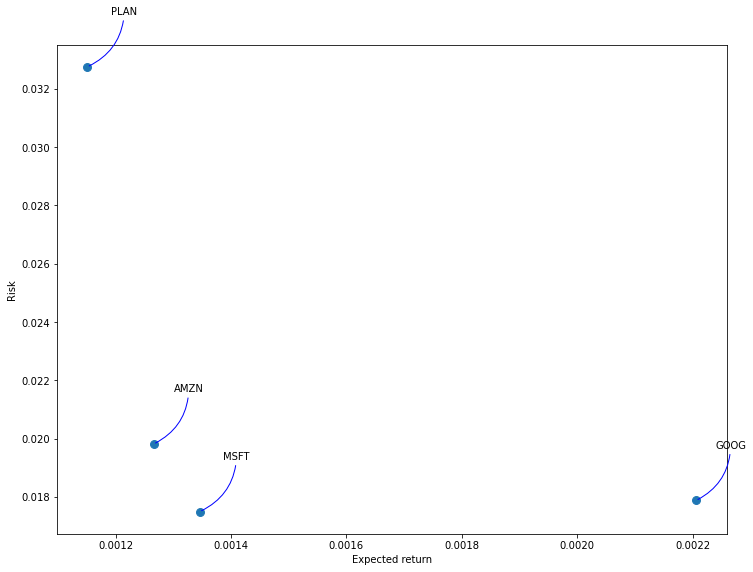

In [24]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 9))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [25]:
# Get the stock quote
planDF = DataReader('PLAN', data_source='yahoo', start='2018-10-01', end=datetime.now())
# Show teh data
planDF.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-10-12,24.700001,21.459999,24.250000,24.299999,15086200,24.299999
2018-10-15,24.500000,22.180000,23.120001,24.299999,1572200,24.299999
2018-10-16,24.660000,22.570000,24.500000,23.020000,1297300,23.020000
2018-10-17,26.969999,22.750000,22.760000,25.430000,1149900,25.430000
2018-10-18,26.200001,24.010000,26.070000,24.500000,1639600,24.500000


In [32]:
planDF.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 656 entries, 2018-10-12 to 2021-05-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       656 non-null    float64
 1   Low        656 non-null    float64
 2   Open       656 non-null    float64
 3   Close      656 non-null    float64
 4   Volume     656 non-null    int64  
 5   Adj Close  656 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 35.9 KB


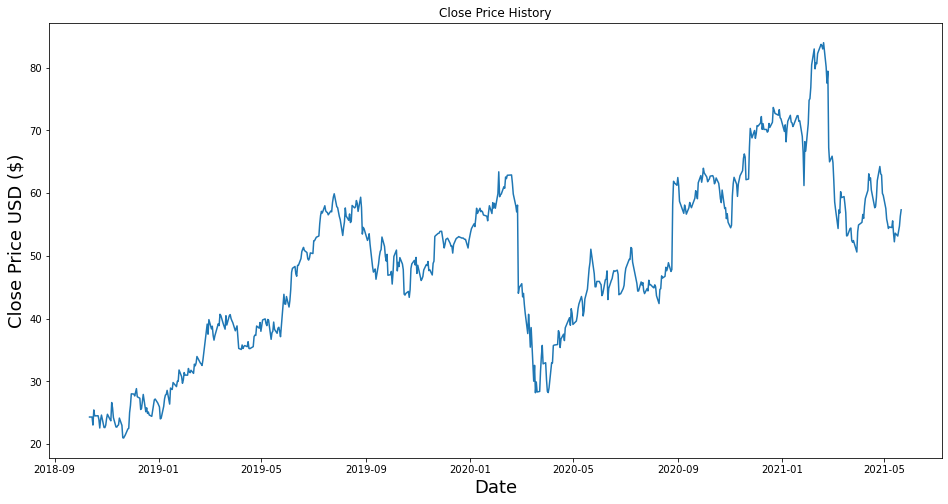

In [26]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(planDF['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [27]:
# Create a new dataframe with only the 'Close column 
data = planDF.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

624

In [28]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# scaled_data

In [29]:
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.05314084, 0.05314084, 0.03283629, 0.07106599, 0.05631344,
       0.05599618, 0.05647208, 0.04679567, 0.02538069, 0.0463198 ,
       0.05805838, 0.02680836, 0.02633249, 0.03251902, 0.0491751 ,
       0.06012055, 0.04711294, 0.0436231 , 0.08978427, 0.07614212,
       0.05187181, 0.02807739, 0.02760152, 0.03140862, 0.03315356,
       0.05044414, 0.03204313, 0.00079314, 0.        , 0.00809008,
       0.02300125, 0.02458755, 0.06424491, 0.08232866, 0.11183375,
       0.11119922, 0.10644035, 0.12499999, 0.10437818, 0.10072968,
       0.07217639, 0.07487309, 0.09200507, 0.11024745, 0.06646572,
       0.07645939, 0.06234135, 0.06583122, 0.05837561, 0.05488577,
       0.08375633, 0.09660534, 0.09866751, 0.08867386, 0.07868019,
       0.04838197, 0.04996827, 0.08010786, 0.09914341, 0.10866115])]
[0.11024744884544585]

[array([0.05314084, 0.05314084, 0.03283629, 0.07106599, 0.05631344,
       0.05599618, 0.05647208, 0.04679567, 0.02538069, 0.0463198 ,
       0.05805838, 0.02680836, 0.02

In [30]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

In [ ]:
planDF.tail()